Import Data

In [1]:
import pandas as pd
import folium 
from folium.plugins import MarkerCluster
import geopandas as gdp
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
##import seaborn as sns

derecho911_df = pd.read_csv("..\data\911_Phone Calls_Derecho_050320 050420.csv")
tornado911_df = pd.read_csv("..\data\911_Phone_Calls_Tornado_030320.csv")

derecho_incidents_df = pd.read_csv("..\data\Computer Aided Dispatch Data_Derecho Incidents 050320_050420.csv", skiprows=3)
tornado_incidents_df = pd.read_csv("..\data\Computer Aided Dispatch Data_Tornado Incidents 030320.csv", skiprows=3)

##print(derecho911_df.head(100))
print(tornado911_df)




    Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
0      3/3/2020 0:34  911 Calls     36.072708     -86.665779   
1      3/3/2020 0:36  911 Calls     36.159634     -86.841904   
2      3/3/2020 0:36  911 Calls     36.264153     -86.708862   
3      3/3/2020 0:36  911 Calls           NaN            NaN   
4      3/3/2020 0:36  911 Calls     36.233467     -86.721077   
..               ...        ...           ...            ...   
470    3/3/2020 4:54  911 Calls     36.142552     -86.635330   
471    3/3/2020 4:54  911 Calls     36.189415     -86.813557   
472    3/3/2020 4:55  911 Calls     36.223534     -86.757874   
473    3/3/2020 4:56  911 Calls     36.168398     -86.783774   
474    3/3/2020 4:58  911 Calls     36.276566     -86.799417   

                    Cell Tower Address  
0           620 Richards RD - N Sector  
1               4507D KENTUCKY AV - SE  
2             329 THELMA ST - S Sector  
3                       526 FOUNDRY DR  
4                 5007B RU

In [2]:
single_family_housing_df = pd.read_csv('../data/2017 single family_final_with_sqft.txt')
print(single_family_housing_df.info)

<bound method DataFrame.info of                    APN DistrictCode  Council District  \
0       103020C01300CO         USD                 24   
1       103020C01400CO         USD                 24   
2       103020C01500CO         USD                 24   
3       103020C01600CO         USD                 24   
4       103020C01700CO         USD                 24   
...                ...          ...               ...   
197109  188100A12100CO         GSD                 33   
197110  188100A12200CO         GSD                 33   
197111  188100A12300CO         GSD                 33   
197112  188100A12400CO         GSD                 33   
197113  188100A12500CO         GSD                 33   

              AddressFullAddress  AddressCity  AddressPostalCode  2017 LAND  \
0       276 WHITE BRIDGE PIKE 13    NASHVILLE              37209      10000   
1       276 WHITE BRIDGE PIKE 14    NASHVILLE              37209      10000   
2       276 WHITE BRIDGE PIKE 15    NASHVILLE 

4a. Locations less impacted or not impacted based on call volume( or lack thereof)

In [3]:
print(derecho911_df.head(5))
#Derecho911_df.groupby('a').count()
derecho911_df['ALI Latitude'] = derecho911_df['ALI Latitude'].fillna(0)
derecho911_df['ALI Longitude'] = derecho911_df['ALI Longitude'].fillna(0)

##Turn NaNs into zeroes
derecho911_df['LatLong'] = derecho911_df.apply(lambda row: [row['ALI Latitude'], row['ALI Longitude']], axis=1)

##Make a latLong column which contains an array which is the form required for map markers
map = folium.Map(location=[36.247802, -86.716847], zoom_start=12)

##This is an arbitrary location within Nashville to start; this could be more centered
m = folium.TileLayer('stamentoner').add_to(map)
for location in derecho911_df['LatLong']:
    folium.Marker(location=location).add_to(map)
map


#neighborhoods = gdp.read_file('..\data\zipcodes.geojson')
#print(neighborhoods.crs)
#neighborhoods.head()



  Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
0   5/3/2020 16:30  911 Calls     36.247802     -86.716847   
1   5/3/2020 16:30  911 Calls     36.143108     -86.800621   
2   5/3/2020 16:30  911 Calls     36.100516     -87.056329   
3   5/3/2020 16:30  911 Calls     36.130021     -86.927819   
4   5/3/2020 16:31  911 Calls     36.142380     -86.881882   

      Cell Tower Address  
0        WIRELESS CALLER  
1    1161 21ST AV S - SE  
2  8013 C MCCRORY LN - N  
3     5758 RIVER RD - SW  
4   3744B ANNEX AVE - SE  


epsg:4326


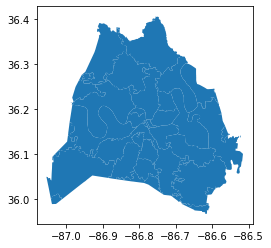

In [4]:
zipcodes = gdp.read_file('..\data\zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )
# zipcodes.geometry.to_crs('EPSG:4326')
# print(zipcodes.crs)
zipcodes.plot();

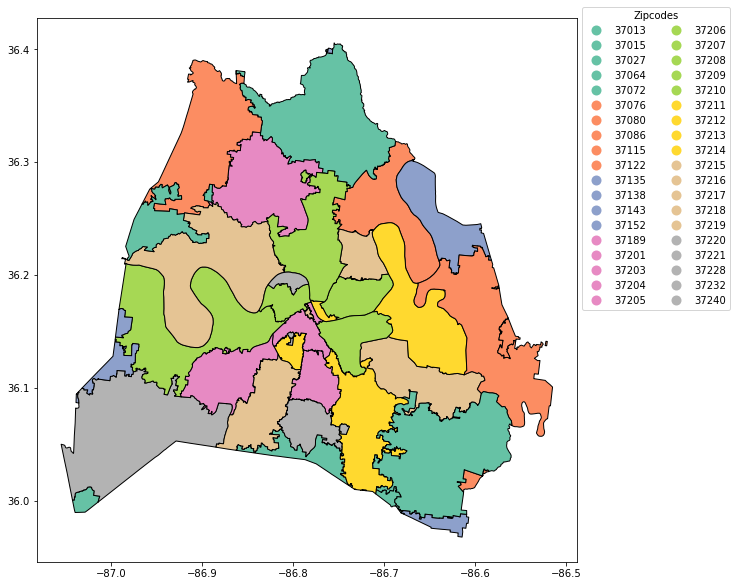

In [5]:

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [10]:
derecho911_df = pd.read_csv("..\data\911_Phone Calls_Derecho_050320 050420.csv")
tornado911_df = pd.read_csv("..\data\911_Phone_Calls_Tornado_030320.csv")
#print(derecho911_df.shape)
#derecho911_df.head(3)
#print(tornado911_df.shape)
#tornado911_df.head(3)


#print(derecho911_df)
derecho911_df['Seizure DateTime'].replace('', np.nan, inplace=True)
derecho911_df['CallTypeId'].replace('', np.nan, inplace=True)
derecho911_df['ALI Latitude'].replace('', np.nan, inplace=True)
derecho911_df['ALI Longitude'].replace('', np.nan, inplace=True)
derecho911_df['Cell Tower Address'].replace('', np.nan, inplace=True)


##derecho911_df = derecho911_df[derecho911_df['ALI Latitude'].notna()]
derecho911_df = derecho911_df.dropna()
#print(derecho911_df)
derecho911_df = derecho911_df.rename(columns={"ALI Latitude": "lat", "ALI Longitude": "lng"}, errors="raise")


In [11]:
derecho911_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483 entries, 0 to 1547
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seizure DateTime    1483 non-null   object 
 1   CallTypeId          1483 non-null   object 
 2   lat                 1483 non-null   float64
 3   lng                 1483 non-null   float64
 4   Cell Tower Address  1483 non-null   object 
dtypes: float64(2), object(3)
memory usage: 69.5+ KB


In [12]:

derecho911_df['geometry'] = derecho911_df.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)

#derecho911_df.head(3)